## VC_2_Lab_14_Face_Recognition_Dlib

Neste jupyter vamos fazer uso do Dlib (http://dlib.net/) e a biblioteca https://pypi.org/project/face-recognition/ para reconhecimento e comparação de faces em imagens.

Este jupyter notebook deve ser executado no Google Colab (https://colab.research.google.com/) devendo o aluno carregar as imagens que estão compactadas no ZIP **Laboratório/face_recognition.zip** na pasta **VC_1/face_recognition/** dentro do seu Google Drive

### Visão Computacional 2

### Prof: José Humberto Cruvinel

Este jupyter notebook deve ser executado no Google Colab (https://colab.research.google.com/) 

In [1]:
!pip install face-recognition

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Execute esta linha para conferir que seu Google Drive está devidamente montado (deve aparecer a pasta 'drive')

%ls -la

total 20
drwxr-xr-x 1 root root 4096 Nov 21 19:09 ./
drwxr-xr-x 1 root root 4096 Nov 21 19:06 ../
drwxr-xr-x 1 root root 4096 Nov 13 17:34 .config/
drwx------ 5 root root 4096 Nov 21 19:09 drive/
drwxr-xr-x 1 root root 4096 Nov 13 17:33 sample_data/


In [4]:
# Entrando no diretório

%cd drive/My Drive/VC_LAB/face_recognition/

/content/drive/My Drive/VC_LAB/face_recognition


In [5]:
# Listando o conteúdo

%ls -la

total 2469
-rw------- 1 root root  108688 Nov 21 18:47 bradley.jpg
-rw------- 1 root root    6242 Nov 21 18:47 chris.jpg
-rw------- 1 root root  494696 Nov 21 18:48 jennifer.jpg
-rw------- 1 root root    5156 Nov 21 18:47 kaua.jpg
-rw------- 1 root root   11738 Nov 21 18:47 photo10.jpg
-rw------- 1 root root    7810 Nov 21 18:47 photo11.jpg
-rw------- 1 root root   39857 Nov 21 18:47 photo1.jpg
-rw------- 1 root root  269102 Nov 21 18:48 photo2.jpg
-rw------- 1 root root 1226020 Nov 21 18:48 photo3.jpg
-rw------- 1 root root  106072 Nov 21 18:47 photo4.jpg
-rw------- 1 root root  196487 Nov 21 18:47 photo5.jpg
-rw------- 1 root root   36510 Nov 21 18:47 photo6.jpg
-rw------- 1 root root    8402 Nov 21 18:47 photo8.jpg
-rw------- 1 root root    7550 Nov 21 18:47 photo9.jpg


Encontrando as faces

In [6]:
import face_recognition
image_1 = face_recognition.load_image_file('photo1.jpg')
face_locations = face_recognition.face_locations(image_1)
face_locations

[(149, 335, 211, 273),
 (41, 525, 84, 482),
 (184, 418, 246, 356),
 (26, 440, 78, 389),
 (49, 308, 101, 256),
 (87, 252, 149, 190),
 (135, 501, 198, 439),
 (22, 347, 65, 304),
 (124, 268, 176, 216)]

In [7]:
from matplotlib.patches import Rectangle
from matplotlib import pyplot as plt
def mark_faces(image, locations):
    plt.imshow(image)
    ax = plt.gca()
    # para cada face, imprime um retangulo
    for location in locations:
        top, right, bottom, left = location
        face_border = Rectangle((left, top), right-left, bottom-top, fill=False, color='red')
        ax.add_patch(face_border)
    plt.show()

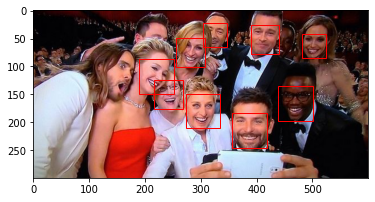

In [8]:
# Marcando as faces
mark_faces(image_1, face_locations)

Encontrando os Landmarks

In [9]:
import face_recognition
# Neste exemplo vamos imprimir os face landmarks (pontos de interesse na face)
image = face_recognition.load_image_file("jennifer.jpg")
face_landmarks_list = face_recognition.face_landmarks(image)
face_landmarks_list

[{'bottom_lip': [(1367, 1610),
   (1266, 1731),
   (1170, 1779),
   (1101, 1783),
   (1026, 1769),
   (930, 1706),
   (839, 1580),
   (881, 1601),
   (1032, 1701),
   (1104, 1716),
   (1171, 1711),
   (1324, 1626)],
  'chin': [(550, 1087),
   (564, 1247),
   (585, 1402),
   (607, 1556),
   (660, 1697),
   (751, 1818),
   (854, 1925),
   (976, 2020),
   (1102, 2052),
   (1231, 2020),
   (1360, 1925),
   (1473, 1822),
   (1564, 1704),
   (1619, 1570),
   (1640, 1422),
   (1658, 1274),
   (1671, 1122)],
  'left_eye': [(788, 1147),
   (851, 1118),
   (927, 1123),
   (986, 1176),
   (914, 1184),
   (842, 1178)],
  'left_eyebrow': [(664, 1029),
   (745, 986),
   (843, 980),
   (939, 999),
   (1028, 1044)],
  'nose_bridge': [(1131, 1153), (1128, 1260), (1123, 1366), (1119, 1472)],
  'nose_tip': [(1013, 1504),
   (1061, 1523),
   (1114, 1548),
   (1170, 1530),
   (1223, 1515)],
  'right_eye': [(1272, 1187),
   (1329, 1138),
   (1403, 1136),
   (1467, 1170),
   (1408, 1199),
   (1336, 1199)],
 

Comparando faces

In [10]:
import face_recognition
image1 = face_recognition.load_image_file("jennifer.jpg")
image2 = face_recognition.load_image_file("bradley.jpg")
encoding1 = face_recognition.face_encodings(image1)[0]
encoding2 = face_recognition.face_encodings(image2)[0]
# Neste exemplo estamos verificando se as pessoas sao iguais
results = face_recognition.compare_faces([encoding1], encoding2)
print(results)

[False]


In [11]:
# Neste outro exemplo, imprimimos a distância entre as faces
matches = face_recognition.face_distance([encoding1], encoding2)
print('Face distance =',matches[0])

Face distance = 0.9439208341768721


chris.jpg
Comparing files chris.jpg and kaua.jpg
Comparing files chris.jpg and photo8.jpg
Comparing files chris.jpg and photo9.jpg
Comparing files chris.jpg and photo11.jpg
[(47, 196, 121, 121)]
Face Distance =  [0.40418114]


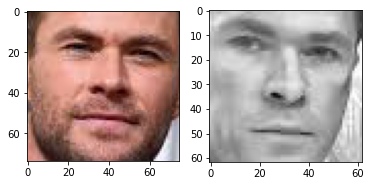

Comparing files chris.jpg and photo10.jpg
Comparing files chris.jpg and bradley.jpg
Comparing files chris.jpg and photo1.jpg
Comparing files chris.jpg and photo6.jpg
Comparing files chris.jpg and photo4.jpg
Comparing files chris.jpg and photo5.jpg
Comparing files chris.jpg and photo2.jpg
Comparing files chris.jpg and jennifer.jpg
Comparing files chris.jpg and photo3.jpg
kaua.jpg
Comparing files kaua.jpg and photo8.jpg
[(53, 196, 182, 67)]
Face Distance =  [0.49311545]


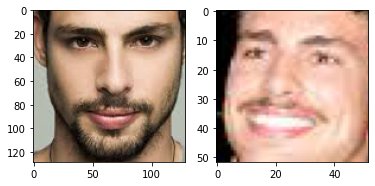

Comparing files kaua.jpg and photo9.jpg
[(53, 196, 182, 67)]
Face Distance =  [0.45957596]


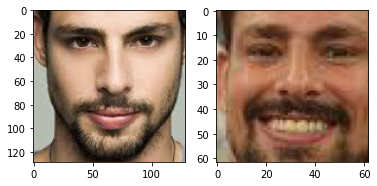

Comparing files kaua.jpg and photo11.jpg
Comparing files kaua.jpg and photo10.jpg
Comparing files kaua.jpg and bradley.jpg
Comparing files kaua.jpg and photo1.jpg
Comparing files kaua.jpg and photo6.jpg
Comparing files kaua.jpg and photo4.jpg
Comparing files kaua.jpg and photo5.jpg
Comparing files kaua.jpg and photo2.jpg
Comparing files kaua.jpg and jennifer.jpg
Comparing files kaua.jpg and photo3.jpg
photo8.jpg
Comparing files photo8.jpg and photo9.jpg
[(70, 59, 113, 16), (20, 210, 72, 158)]
Face Distance =  [0.49413316]


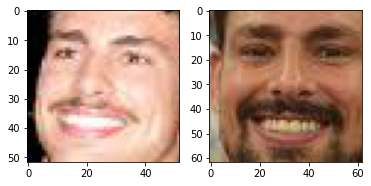

Comparing files photo8.jpg and photo11.jpg
Comparing files photo8.jpg and photo10.jpg
Comparing files photo8.jpg and bradley.jpg
Comparing files photo8.jpg and photo1.jpg
Comparing files photo8.jpg and photo6.jpg
Comparing files photo8.jpg and photo4.jpg
Comparing files photo8.jpg and photo5.jpg
Comparing files photo8.jpg and photo2.jpg
Comparing files photo8.jpg and jennifer.jpg
Comparing files photo8.jpg and photo3.jpg
photo9.jpg
Comparing files photo9.jpg and photo11.jpg
Comparing files photo9.jpg and photo10.jpg
Comparing files photo9.jpg and bradley.jpg
Comparing files photo9.jpg and photo1.jpg
Comparing files photo9.jpg and photo6.jpg
Comparing files photo9.jpg and photo4.jpg
Comparing files photo9.jpg and photo5.jpg
Comparing files photo9.jpg and photo2.jpg
Comparing files photo9.jpg and jennifer.jpg
Comparing files photo9.jpg and photo3.jpg
photo11.jpg
Comparing files photo11.jpg and photo10.jpg
Comparing files photo11.jpg and bradley.jpg
Comparing files photo11.jpg and photo1.

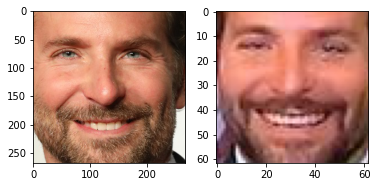

Comparing files bradley.jpg and photo6.jpg
Comparing files bradley.jpg and photo4.jpg
Comparing files bradley.jpg and photo5.jpg
[(201, 409, 468, 141)]
Face Distance =  [0.37069031]


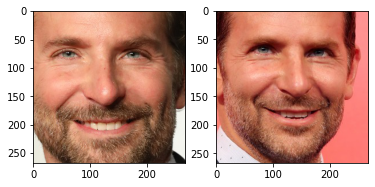

Comparing files bradley.jpg and photo2.jpg
Comparing files bradley.jpg and jennifer.jpg
Comparing files bradley.jpg and photo3.jpg
photo1.jpg
Comparing files photo1.jpg and photo6.jpg
Comparing files photo1.jpg and photo4.jpg
Comparing files photo1.jpg and photo5.jpg
[(149, 335, 211, 273), (41, 525, 84, 482), (184, 418, 246, 356), (26, 440, 78, 389), (49, 308, 101, 256), (87, 252, 149, 190), (135, 501, 198, 439), (22, 347, 65, 304), (124, 268, 176, 216)]
Face Distance =  [0.48365715]


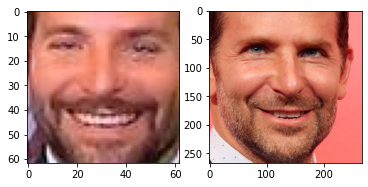

Comparing files photo1.jpg and photo2.jpg
Comparing files photo1.jpg and jennifer.jpg
Comparing files photo1.jpg and photo3.jpg
photo6.jpg
Comparing files photo6.jpg and photo4.jpg
Comparing files photo6.jpg and photo5.jpg
Comparing files photo6.jpg and photo2.jpg
Comparing files photo6.jpg and jennifer.jpg
[(78, 331, 130, 279), (44, 446, 95, 394)]
Face Distance =  [0.4775992]


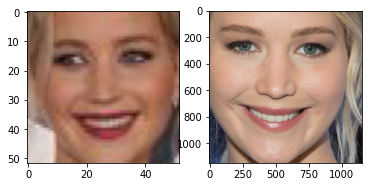

Comparing files photo6.jpg and photo3.jpg
photo4.jpg
Comparing files photo4.jpg and photo5.jpg
Comparing files photo4.jpg and photo2.jpg
Comparing files photo4.jpg and jennifer.jpg
[(106, 215, 196, 126), (105, 370, 179, 295), (68, 557, 175, 450)]
Face Distance =  [0.39955873]


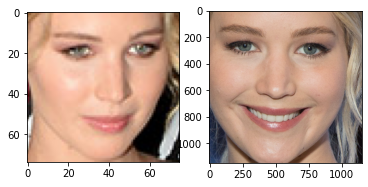

Comparing files photo4.jpg and photo3.jpg
[(106, 215, 196, 126), (105, 370, 179, 295), (68, 557, 175, 450)]
Face Distance =  [0.48867864]


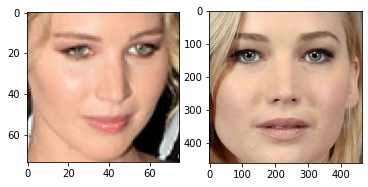

photo5.jpg
Comparing files photo5.jpg and photo2.jpg
Comparing files photo5.jpg and jennifer.jpg
Comparing files photo5.jpg and photo3.jpg
photo2.jpg
Comparing files photo2.jpg and jennifer.jpg
Comparing files photo2.jpg and photo3.jpg
jennifer.jpg
Comparing files jennifer.jpg and photo3.jpg
[(869, 1763, 2019, 613)]
Face Distance =  [0.43629303]


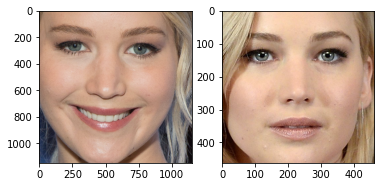

photo3.jpg
Done!


In [45]:
# Agora com todas as imagens
import os
THRESHOLD = 0.5
def compare_images(path):
  done = []
  for filename_x in os.listdir(path):
    print(filename_x)
    image1 = face_recognition.load_image_file(filename_x)
    encoding1 = face_recognition.face_encodings(image1)
    face_loc1 = face_recognition.face_locations(image1)
    for filename_y in os.listdir(path):
      if (filename_x != filename_y and '{}_{}'.format(filename_y,filename_x) not in done):
        done.append('{}_{}'.format(filename_x,filename_y))
        print('Comparing files {} and {}'.format(filename_x,filename_y))
        image2 = face_recognition.load_image_file(filename_y)
        encoding2 = face_recognition.face_encodings(image2)
        face_loc2 = face_recognition.face_locations(image2)
        for idx, face_encoding_1 in enumerate(encoding1):
          for idy, face_encoding_2 in enumerate(encoding2):
            face_distance = face_recognition.face_distance([face_encoding_1], face_encoding_2)
            if (face_distance < THRESHOLD):
              print('Face Distance = ',face_distance)
              f = plt.figure()
              f.add_subplot(1,2, 1)
              top, right, bottom, left = face_loc1[idx]
              plt.imshow(image1[top: bottom, left: right, :])
              f.add_subplot(1,2, 2)
              top, right, bottom, left = face_loc2[idy]
              plt.imshow(image2[top: bottom, left: right, :])
              plt.show(block=True)  
  print('Done!')        
compare_images('.')      

# Exercício 14.1

Veja que no exercício acima estamos imprimindo toda a imagem quando encontramos faces iguais. 

Melhore essa implementação para que somente as faces sejam imprimidas.

Adicione novas imagens e ajuste o valor do THRESHOLD. Qual o melhor valor?

FIM